In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv("/content/BGC.csv")

In [ ]:
df.head()

,MAGs,Phylum,BGCs
0,CS_MA19,Actinomycetia,2
1,CS_MA10,Alphaproteobacteria,3
2,CS_MA11,Alphaproteobacteria,7
3,CS_MA16,Alphaproteobacteria,5
4,CS_MA2,Alphaproteobacteria,2


In [ ]:
df.shape

(33, 3)

In [ ]:
def get_label_rotation(angle, offset):
    # Rotation must be specified in degrees :(
    rotation = np.rad2deg(angle + offset)
    if angle <= np.pi:
        alignment = "right"
        rotation = rotation + 180
    else:
        alignment = "left"
    return rotation, alignment

In [ ]:
def add_labels(angles, values, labels, offset, ax):

    # This is the space between the end of the bar and the label
    padding = 4

    # Iterate over angles, values, and labels, to add all of them.
    for angle, value, label, in zip(angles, values, labels):
        angle = angle

        # Obtain text rotation and alignment
        rotation, alignment = get_label_rotation(angle, offset)

        # And finally add the text
        ax.text(
            x=angle,
            y=value + padding,
            s=label,
            ha=alignment,
            va="center",
            rotation=rotation,
            rotation_mode="anchor"
        )

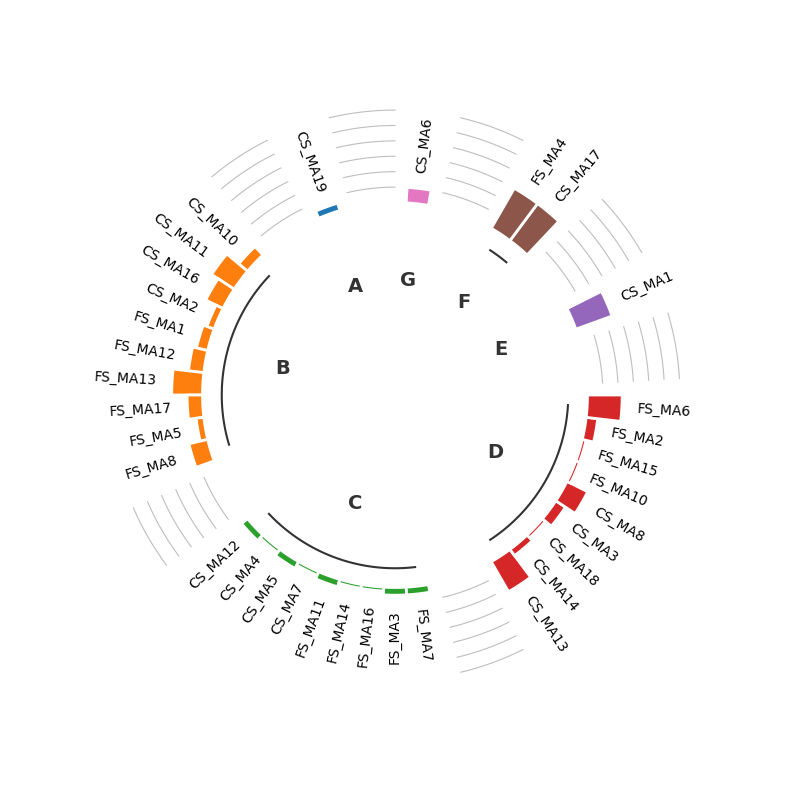

In [ ]:
# All this part is like the code above
VALUES = df["BGCs"].values
LABELS = df["MAGs"].values
GROUP = df["Phylum"].values

PAD = 3
ANGLES_N = len(VALUES) + PAD * len(np.unique(GROUP))
ANGLES = np.linspace(0, 2 * np.pi, num=ANGLES_N, endpoint=False)
WIDTH = (2 * np.pi) / len(ANGLES)

GROUPS_SIZE = [len(i[1]) for i in df.groupby("Phylum")]

offset = 0
IDXS = []
for size in GROUPS_SIZE:
    IDXS += list(range(offset + PAD, offset + size + PAD))
    offset += size + PAD

OFFSET = np.pi / 2  # 90 degrees in radians (top position)
fig, ax = plt.subplots(figsize=(20, 10), subplot_kw={"projection": "polar"})
ax.set_theta_offset(OFFSET)
ax.set_ylim(-50, 50)
ax.set_frame_on(False)
ax.xaxis.grid(False)
ax.yaxis.grid(False)
ax.set_xticks([])
ax.set_yticks([])

GROUPS_SIZE = [len(i[1]) for i in df.groupby("Phylum")]
COLORS = [f"C{i}" for i, size in enumerate(GROUPS_SIZE) for _ in range(size)]

ax.bar(
    ANGLES[IDXS], VALUES, width=WIDTH, color=COLORS,
    edgecolor="white", linewidth=2
)

add_labels(ANGLES[IDXS], VALUES, LABELS, OFFSET, ax)

# Extra customization below here --------------------

# This iterates over the sizes of the groups adding reference
# lines and annotations.

offset = 0
for group, size in zip(["A", "B", "C", "D", "E", "F", "G"], GROUPS_SIZE):
    # Add line below bars
    x1 = np.linspace(ANGLES[offset + PAD], ANGLES[offset + size + PAD - 1], num=50)
    ax.plot(x1, [-5] * 50, color="#333333")

    # Add text to indicate group
    ax.text(
        np.mean(x1), -20, group, color="#333333", fontsize=14,
        fontweight="bold", ha="center", va="center"
    )

    # Add reference lines at 20, 40, 60, and 80
    x2 = np.linspace(ANGLES[offset], ANGLES[offset + PAD - 1], num=50)
    ax.plot(x2, [4] * 50, color="#bebebe", lw=0.8)
    ax.plot(x2, [8] * 50, color="#bebebe", lw=0.8)
    ax.plot(x2, [12] * 50, color="#bebebe", lw=0.8)
    ax.plot(x2, [16] * 50, color="#bebebe", lw=0.8)
    ax.plot(x2, [20] * 50, color="#bebebe", lw=0.8)
    ax.plot(x2, [24] * 50, color="#bebebe", lw=0.8)

    offset += size + PAD